In [173]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [174]:
df = pd.read_csv("DATA.csv")
df.sample(5)

,country,city,duration,stops,departure_time,arrival_time,airport_id,airline,price,duration_s_,...,population,area,pop_density,coastline,migration,infant_mortality,gdp,birthrate,deathrate,distance
10987,United Kingdom,Glasgow,0 days 21:40:00,2.0,2024-03-15 19:00:00,2024-03-16 16:40:00,GLA,Iberia,355.0,78000.0,...,60609153,6.340814e+05,641.281524,5.08,2.19,5.16,27700.0,10.71,10.13,2489.68
6070,Japan,Osaka,0 days 23:00:00,2.0,2024-03-15 13:00:00,2024-03-16 21:00:00,KIX,Royal Air Maroc,659.0,82800.0,...,127463611,9.785889e+05,873.862626,7.87,0.00,3.26,28200.0,9.37,9.16,11497.12
3636,Finland,Vaasa,0 days 09:40:00,2.0,2024-03-15 13:25:00,2024-03-16 01:05:00,VAA,Royal Air Maroc,585.0,34800.0,...,5231372,8.757922e+05,40.144845,0.37,0.95,3.57,27400.0,10.45,9.86,3856.04
8352,Philippines,Iloilo,1 days 00:45:00,2.0,2024-03-15 09:30:00,2024-03-16 18:15:00,ILO,Etihad Airways,962.0,89100.0,...,89468677,7.769970e+05,772.335018,12.10,-1.50,23.51,4600.0,24.89,5.41,12807.74
7173,Morocco,Oujda,0 days 20:50:00,2.0,2024-03-15 02:25:00,2024-03-15 23:15:00,OUD,Lufthansa,340.0,75000.0,...,33241259,1.156560e+06,192.695256,0.41,-0.98,41.62,4000.0,21.98,5.58,537.81


In [175]:
X = df.drop(['city', 'duration', 'departure_time', 'arrival_time', 'airport_id', 'price'], axis=1)
y = df['price']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=77,
                                                    stratify=X[['country']])

X.drop(columns=['country'], inplace=True)
X_train = X_train.drop(columns=['country'])
X_test = X_test.drop(columns=['country'])

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(9401, 16)

(3134, 16)

(9401,)

(3134,)

In [177]:
numeric_features = ["stops", "duration_s_", "population", "area", "distance", "migration", "pop_density", "coastline", "gdp", "infant_mortality", "deathrate", "birthrate"]
categorical_features = ["airline", "departure_tod", "arrival_tod", "region"]

In [178]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [194]:
model = RandomForestRegressor(random_state=77)

print(f'Fitting ...')
    
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model) 
])

regression_pipeline.fit(X_train, y_train)
    
print(f'Scoring ...')
    
y_pred = regression_pipeline.predict(X_test)
    
print(f"MAE : {mean_absolute_error(y_test, y_pred)}",
      f"MSR : {mean_squared_error(y_test, y_pred)}",
      f"R2  : {r2_score(y_test, y_pred)}", sep='\n')

# {'score': 0.8738532259471257, 'mae': 75.58016112182416, 'msr': 28359.586170813967, 'R2': 0.8738532259471257}

Fitting ...
Scoring ...
MAE : 75.29731409143477
MSR : 27608.754493106826
R2  : 0.8771930135388409


Variable: arrival_tod          Importance: 0.5
Variable: airline              Importance: 0.17
Variable: stops                Importance: 0.03
Variable: departure_tod        Importance: 0.03
Variable: area                 Importance: 0.03
Variable: migration            Importance: 0.03
Variable: duration_s_          Importance: 0.02
Variable: pop_density          Importance: 0.02
Variable: coastline            Importance: 0.02
Variable: infant_mortality     Importance: 0.02
Variable: region               Importance: 0.01
Variable: population           Importance: 0.01
Variable: deathrate            Importance: 0.01
Variable: distance             Importance: 0.01
Variable: gdp                  Importance: 0.0
Variable: birthrate            Importance: 0.0


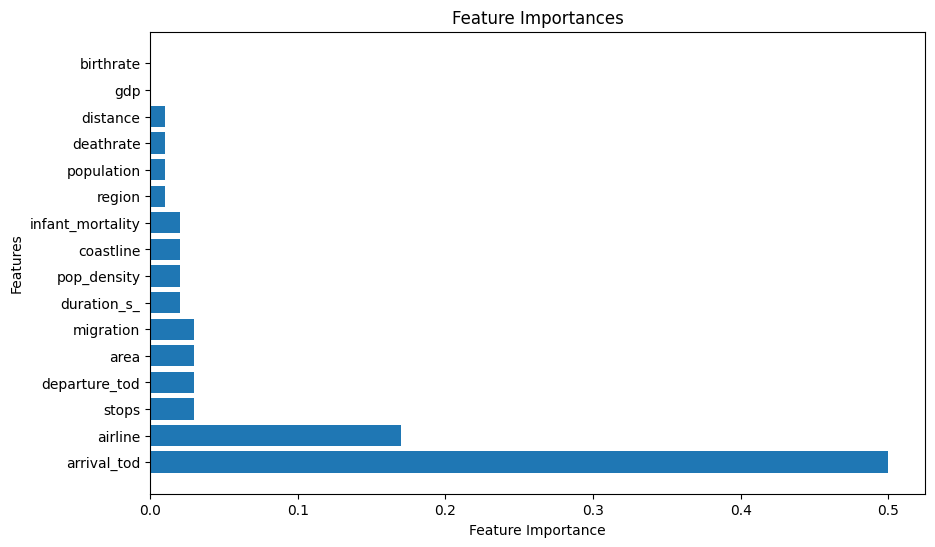

In [184]:
# Let's get features importance in the model
importances = list(regression_pipeline.named_steps['regressor'].feature_importances_)
feature_list = list(X_train.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)
for pair in feature_importances :
    print('Variable: {:20} Importance: {}'.format(*pair))

features, importances = zip(*feature_importances)

# Let's vizsalisze it
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [190]:
# Results on the training data
y_train_pred = regression_pipeline.predict(X_train)

print("MAE : ", mean_absolute_error(y_train, y_train_pred))
print("R2  : ", r2_score(y_train, y_train_pred))

MAE :  34.41721405735941
R2  :  0.96800573856673
